THREAT HUNTING USING MISP & SPLUNK
---
This project was to explore using tools and techniques to hunt for threats. First, I did some investigative work and searched for IOCs, analyzing artifacts to figure out what type of attack might've happened. I used tools such as MISP and Splunk to analyze log data and piece together the story of a potential network compromise.

PART 1:
------------------------------
List of possible IoC's to investigate:

MD5 Hashes:
1.) acb19c9d138687d8b77b9a16318f7897
2.) 4a6742b13afe1d19b88536343b78fd87

Domains:
3.) hxxp://caracasmateriais.blogspot[.]com/
4.) hxxp://alphastand.top/alien/fre[.]php
5.) hxxps://mentalpublichealth[.]online/bancasella

IPs:
6.) 185[].]150[].]128[].21
7.) 89[].]189[].]197[].55
8.) 46[].]101[].]9[].51

NOTE: THESE IoCs have been sanitized as they could be malicious, hence they should not be accessed directly.

1.) 
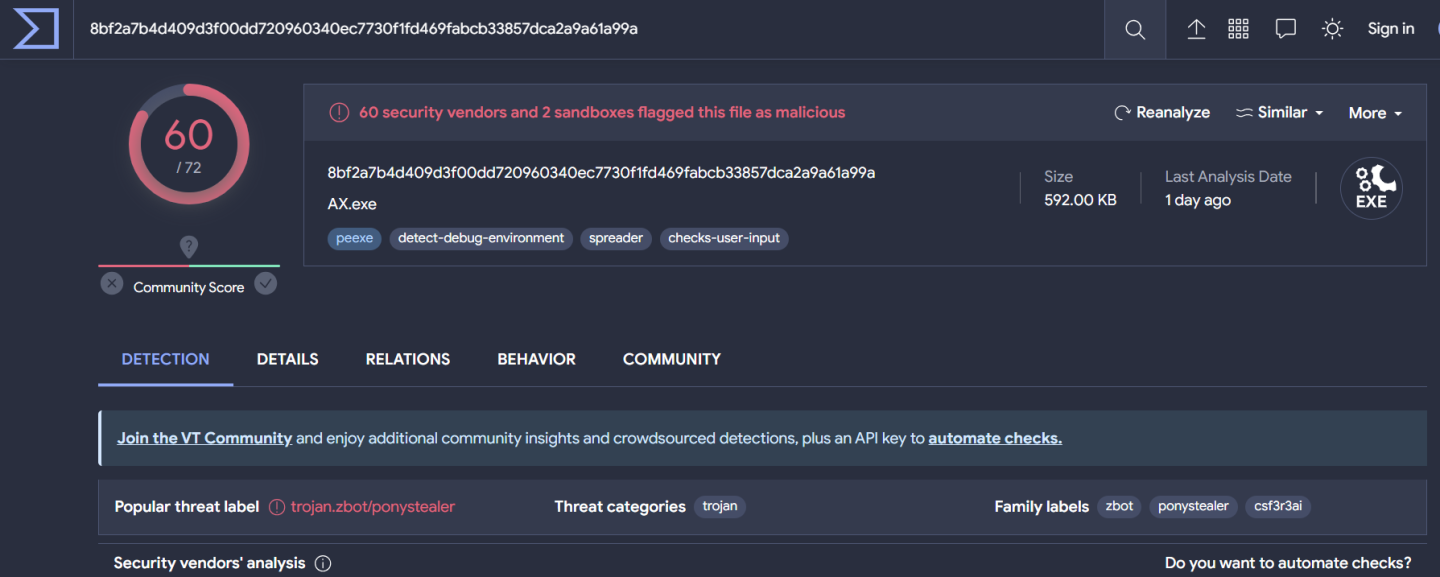
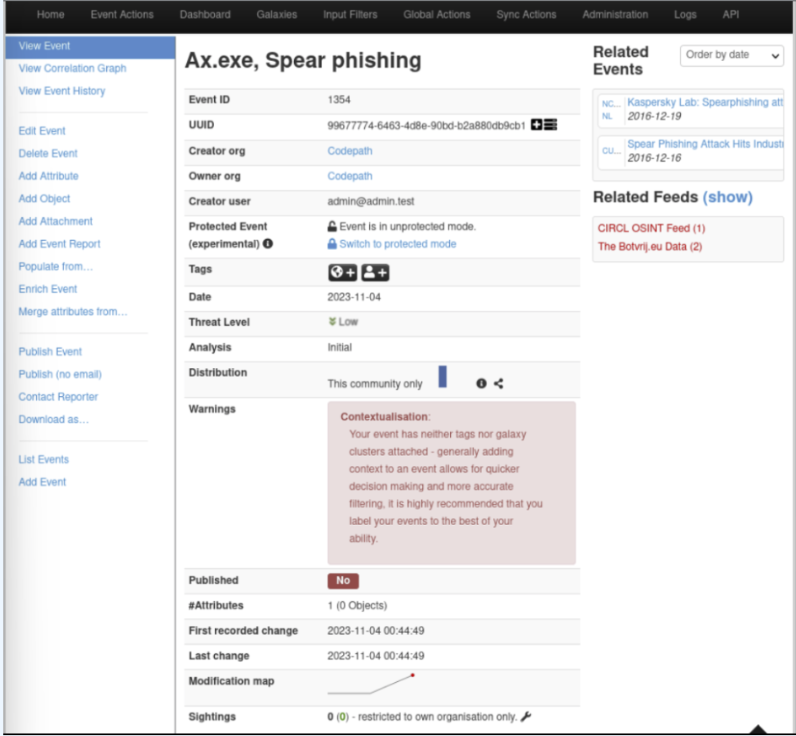

First I investigated the hash in Virustotal in which it deemed it be malicious where I found it to have the MITRE ATT&CK techniques of Discovery, Defense Evasion and Command & Control. Discovery because it was found querying list of running processes and reading software policies. Defense Evasion because it was obfuscating files or information by having binaries with packed/ crypted data and it could also maliciously modify compenents of a victims environment to hinder/ disable defense mechanisms. Command & Control because threat actors could communicate through using application layer protocols to avoid detection/ network filtering by blending in with existing network traffic. On MISP, I had created an event which had linked the hash to an existing event on spear phishing campaign targetting industrial companies.

2.)
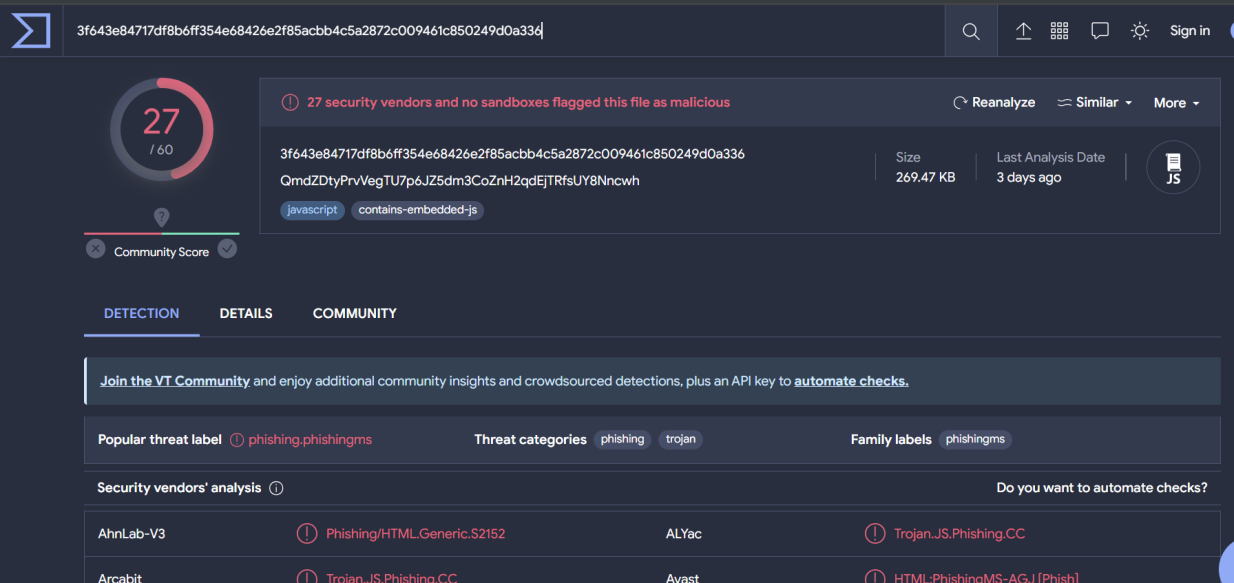
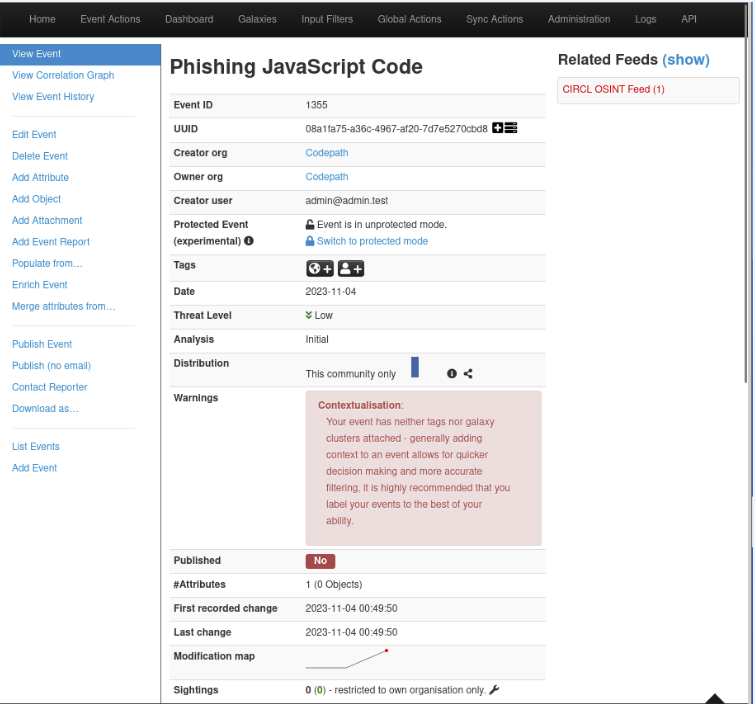

Virustotal flagged this hash as a malicious JS code that seemed to be a link of some sort that took you to a page called hxxp://use.fontawesome[.]com/releases/v5.7.0/css/all.css (sanitized link) and the hash was flagged as a phishing and trojan link. MISP didn't have any information on this hash. 

3.)
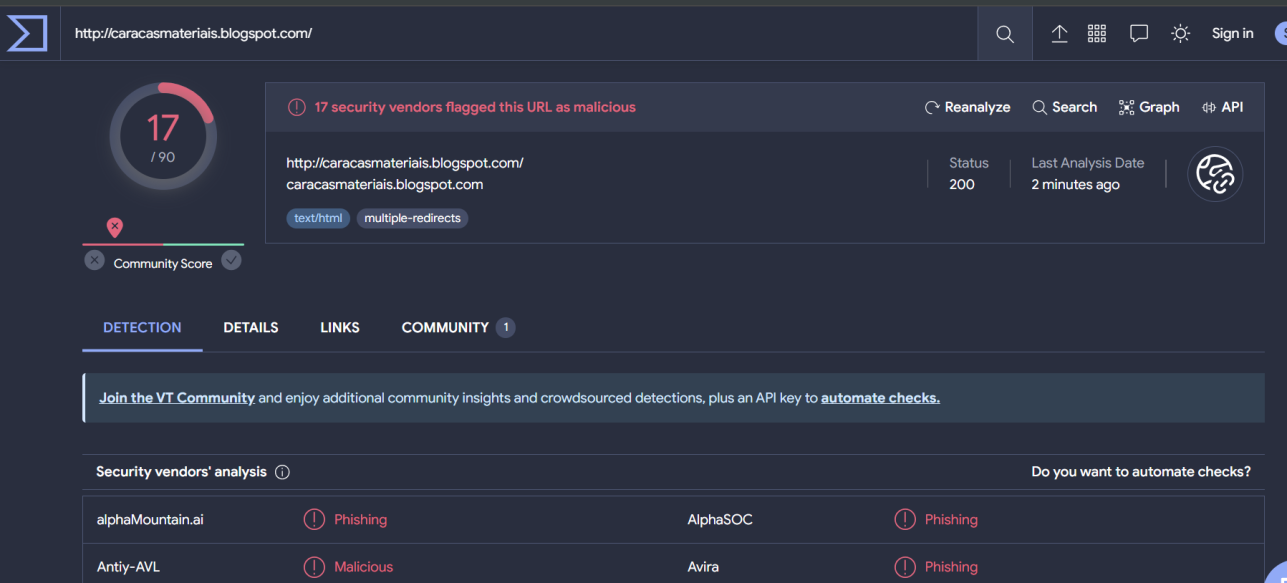
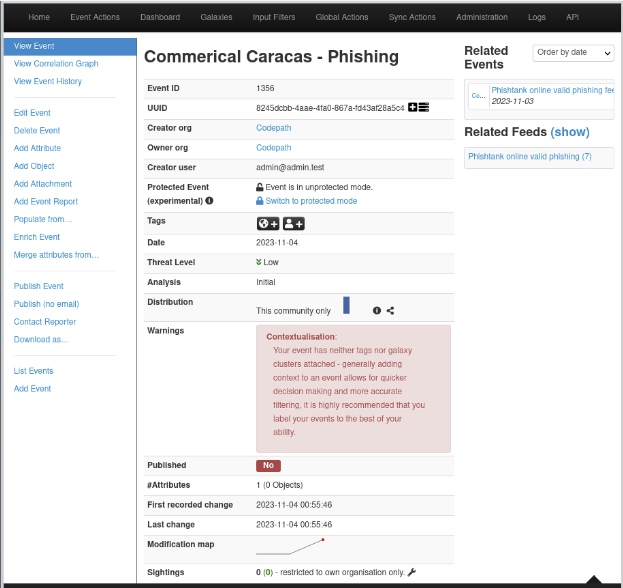

Virustotal flagged it as malicious and the title of this was commercial caracas with the threat labels as phishing & fraud. MISP had an event named Phishtank online phishing feed, indicating that this URL was probably used in a phishing campaign.

4.)
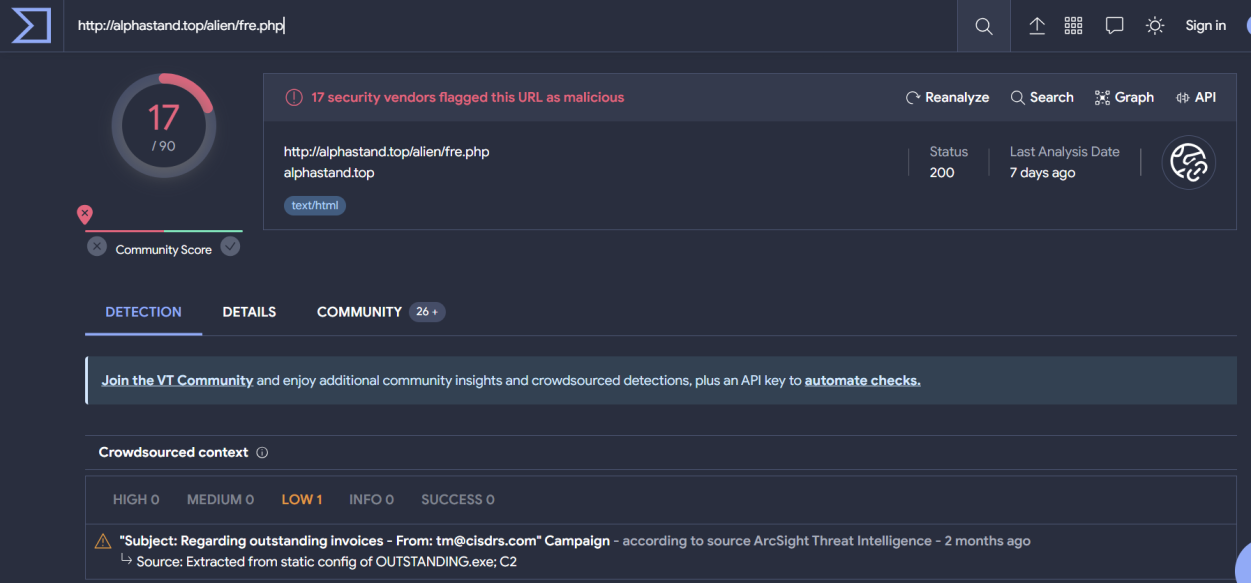
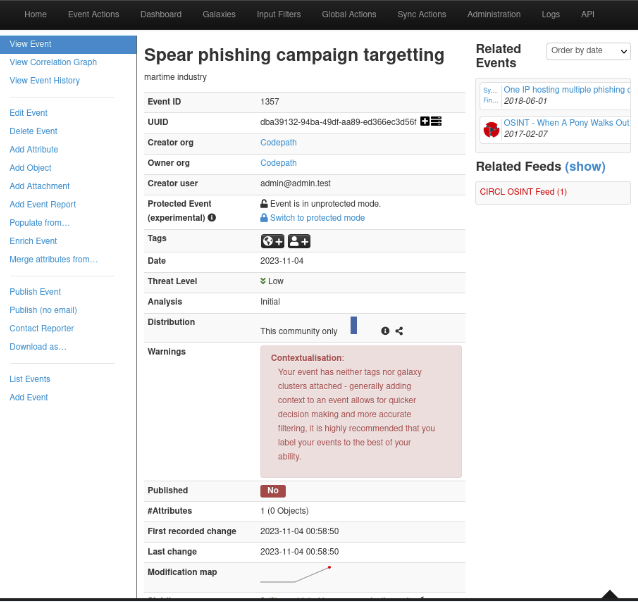

Virustotal flagged it malicious and I found that URL this was a part of a Multi-year spear phishing campaign targeting maritime industry and was in the lokibot malware family. The subject of these phishing emails were "Regarding outstanding invoices - From:tm@cisdrs.com".

5.)
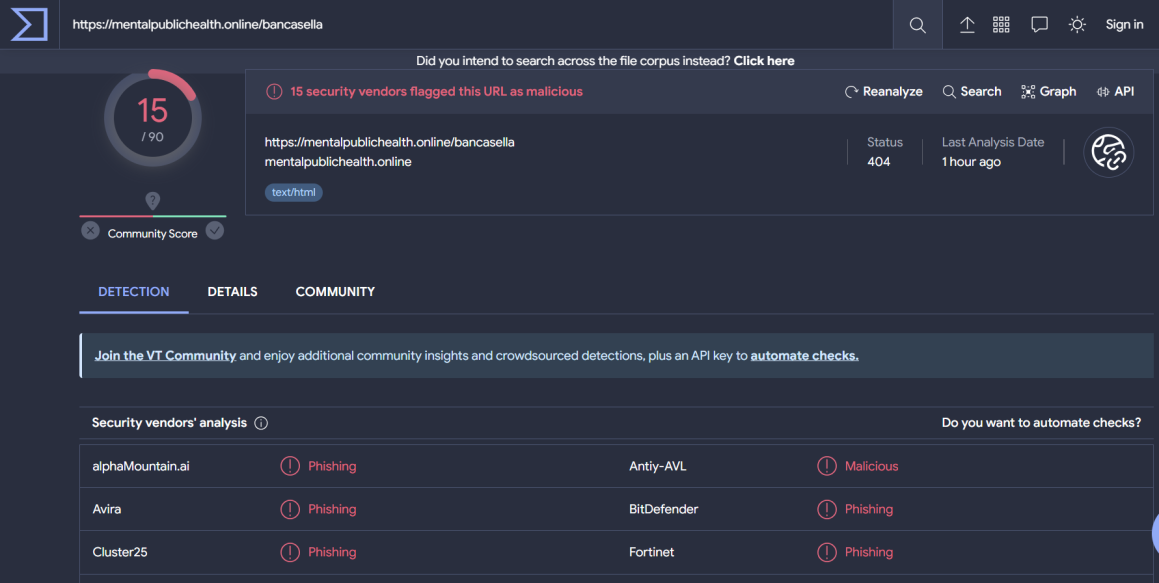
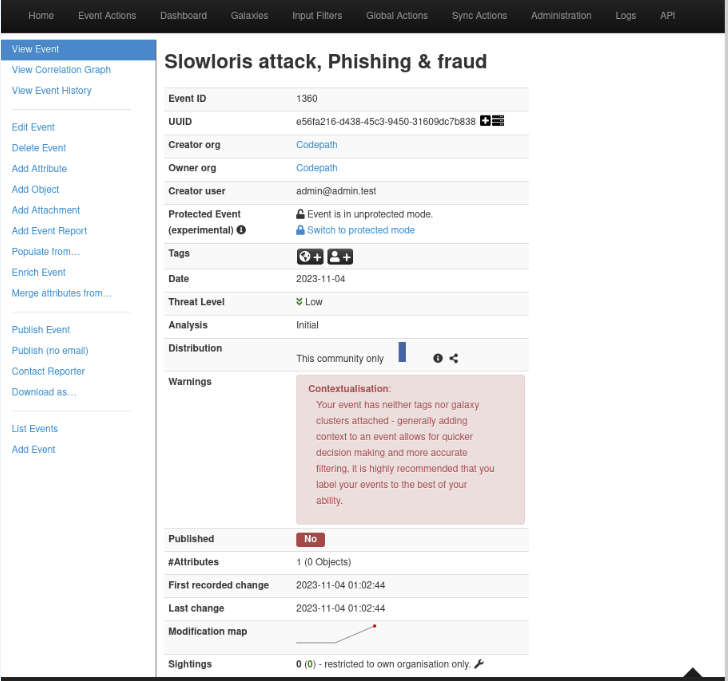

Virustotal flagged URL as malicious and I found that the page usually comes up as "404 Not Found" to deceive the victim while the packet header contains keep-alive packets. This hinted at a possible DDoS attack called slowloris, since I learned in class how the slowloris attack aims to keep the line active for as long as it can, diverting resources from server for legitmate users trying to access the webpage.

6.)
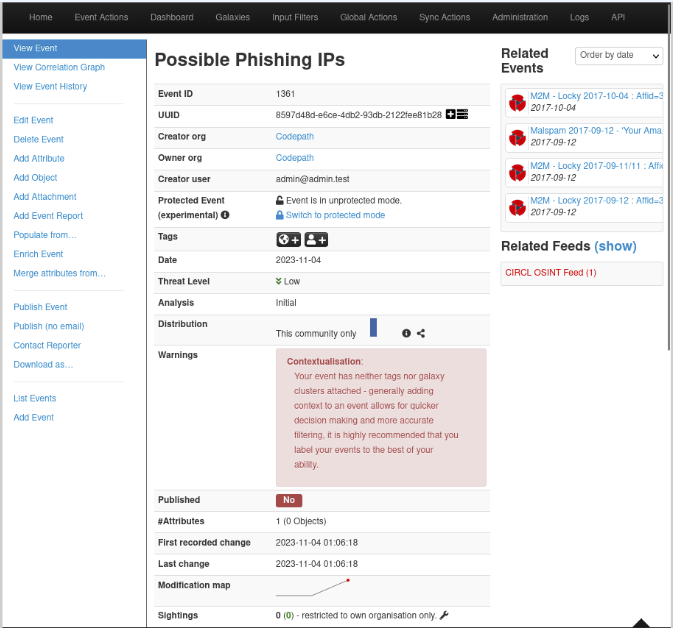

This IP address was not flagged on Virustotal, nor were there any hits on AbuseIPDB or but the origin of this IP was from Nicosia, Lefkosia, Cyprus with the domain name alastyr.com. However I got 4 hits on MISP and it said that this IP was used in a M2M ransomware attack called locky and the reason why I didn't get any hits on virustotal or AbuseIPDB is that it could mean that this is a recycled IP and no one reported it when the ransomware attack was happening.

7.)
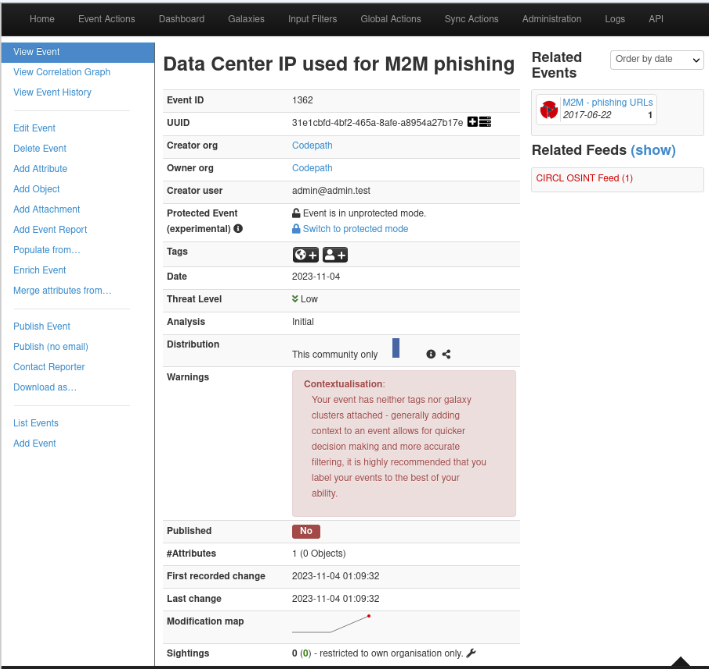

This IP address was not flagged on Virustotal or on AbuseIPDB, the origin of this IP is from Goteborg, Vastra Gotalands Ian, Sweden and seems to be an IP for a data center. However there was a MISP feed that flagged this as a IP used in M2M phishing attack which could mean that this is also a recycled IP.


8.)
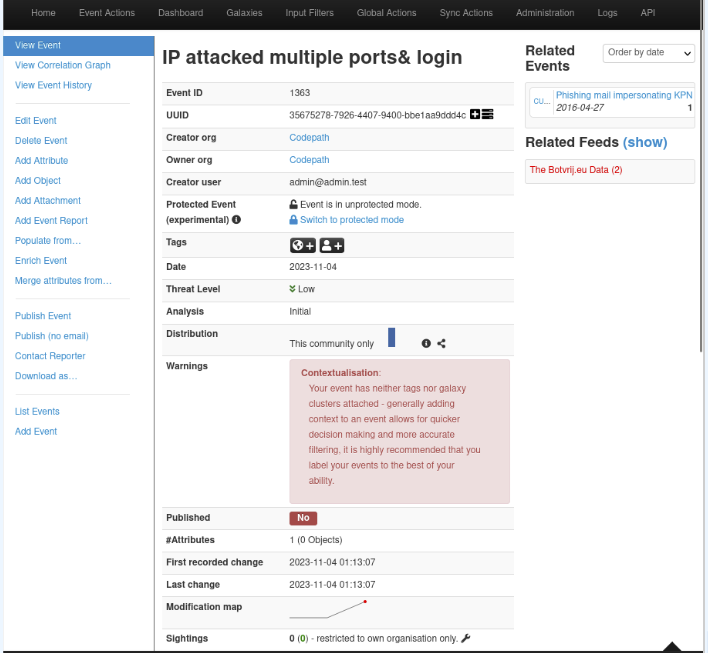

This IP address was not flagged on Virustotal, however I found that on AbuseIPBD it was a malicious IP originating from London, England mentioning this IP was involved in attacks on multiple ports & logins through email-spam, brute-force, exploited hosts, web application attacks and SSH. This was also flagged on a MISP feed for sending phishing mail impersonating KPN, a Dutch telecommunications company. Since the attack was reported on AbuseIPDB on 2023-09-17 03:34:49 which is relatively recent, there is still a posibility that this IP is still active and malicious. But there is a chance this IP address has already been recycled.

PART 2:
--------------------------------------------------------------------------------------------------------------------------------------------------------
In this part of the project, I downloaded a MISP feed as a .CSV file then had Splunk aggregate it the data. And I was tasked with finding the IP address of the compromised computer, what other sites the computer had recently visited and the malware that is likely running on the computer. I found that the compromised IP was 182[].]54[].]217[].2, it accessed the website hxxps://www.service-management[.]tk and the malware was the Log4j vulnerability.
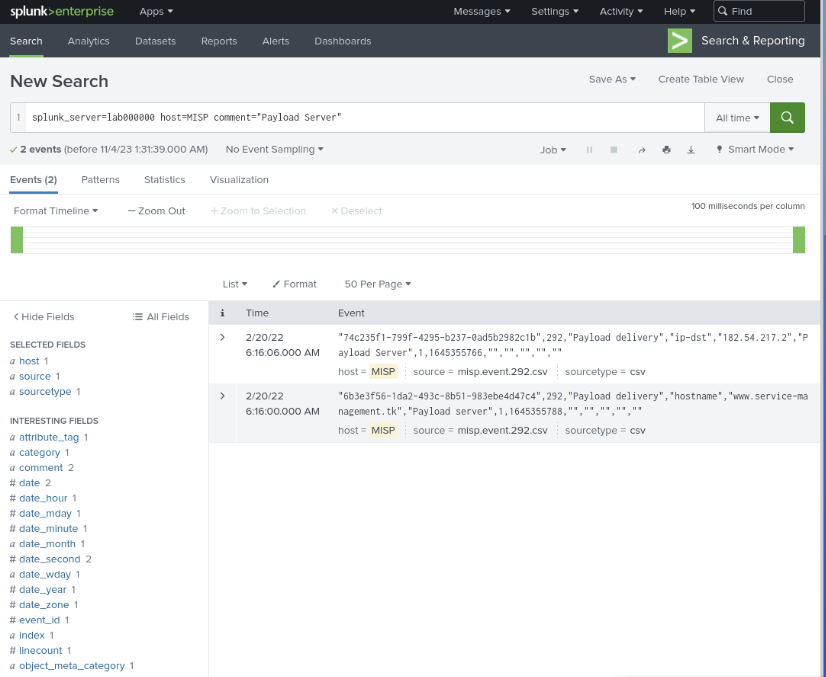

Another IoC could be the IP address, 142[].]44[].]135[].86 which was first found through the splunk query “splunk_server=lab000000 source="misp.event.292.csv" comment="Tunneling Server". Also another IoC identified from the log was the url “hxxp://www.microsoft-updateserver[.]cf” and this was found through the splunk query splunk_server=lab000000 source="misp.event.292.csv" comment="Command and Control (C2) Server" and there were other IP addresses starting with 51… that were found to be IoCs. And the first 2 IoCs were validated with MISP which stated that the IP 142.44.135.86 and the url was part of the Log4j vulnerability and the IP is “Tunneling Server” and the url is a “Command and Control (C2) server”.